# Quick visualization of iV2V

Minimal code to demonstrate the iV2V dataset

## Preliminaries

In [ ]:
import os
from pathlib import Path
os.chdir(Path.cwd().parent)

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from utils import spatial_avg

In [3]:
data_path = Path.cwd().parent/"data"/"iV2V"
sl_time = 'Sidelink Epoch Time [sec]'
pos_x = 'X-coordinate [m]'
pos_y = 'Y-coordinate [m]'

## Data preview

In [4]:
iv2v_df = pd.read_parquet(data_path/'iV2V.parquet')
iv2v_df

,Location Epoch Time [sec],Sidelink Epoch Time [sec],Time Difference [sec],X-coordinate [m],Y-coordinate [m],SNR [dB],RSRP [dBm],RSSI [dBm],Noise Power,Time [sec],Fraction Time [sec],Frame Number,Subframe Number,UHD Rx Gain [dB],SCI FRL N,SCI FRL L,RLC Header SN,Source AGV Index,Destination AGV Index,Wall Scenario
timestamp,,,,,,,,,,,,,,,,,,,,
2022-02-02 15:50:00.037815+01:00,1.643813e+09,1.643813e+09,0.004431,1.548226,0.498350,15.0565,-49.9551,-22.1419,0.171367,1.136078e+09,0.400549,825,4,61.0,10,0,845,2,3,A
2022-02-02 15:50:00.040787+01:00,1.643813e+09,1.643813e+09,0.001459,1.548226,0.498350,20.7790,-52.0963,-24.3590,0.026671,1.136089e+09,0.976997,825,7,51.0,10,0,30,3,1,A
2022-02-02 15:50:00.040811+01:00,1.643813e+09,1.643813e+09,0.001435,1.548226,0.498350,13.7641,-60.2519,-32.4480,0.021119,1.136074e+09,0.842874,825,7,46.0,10,0,30,3,2,A
2022-02-02 15:50:00.089823+01:00,1.643813e+09,1.643813e+09,0.001844,1.554252,0.497446,24.1981,-49.6861,-22.0566,0.023635,1.136074e+09,0.891874,830,6,46.0,10,0,163,1,2,A
2022-02-02 15:50:00.089891+01:00,1.643813e+09,1.643813e+09,0.001912,1.554252,0.497446,21.1011,-43.8411,-16.1040,0.184630,1.136078e+09,0.452549,830,6,61.0,10,0,163,1,3,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-03 16:16:59.866300+01:00,1.643901e+09,1.643901e+09,0.002045,1.077898,0.502681,11.6367,-50.5518,-22.7954,0.329273,1.136095e+09,0.520217,733,7,65.0,10,0,933,1,3,A
2022-02-03 16:16:59.915400+01:00,1.643901e+09,1.643901e+09,0.003375,1.092075,0.501757,12.6099,-49.7144,-21.8731,0.323063,1.136095e+09,0.569217,738,6,65.0,10,0,936,1,3,A
2022-02-03 16:16:59.915404+01:00,1.643901e+09,1.643901e+09,0.003371,1.092075,0.501757,23.4027,-49.6270,-21.8801,0.028823,1.136076e+09,0.199160,738,6,50.0,10,0,936,1,2,A


## Heatmap plots

pandas plotting functions can be used to plot heatmaps from the data. Since the AGV drove over the same locations several times, spatial averaging of the data is recommended for a better visualization.
The labels in the dataframe allow simple queries to filter the data

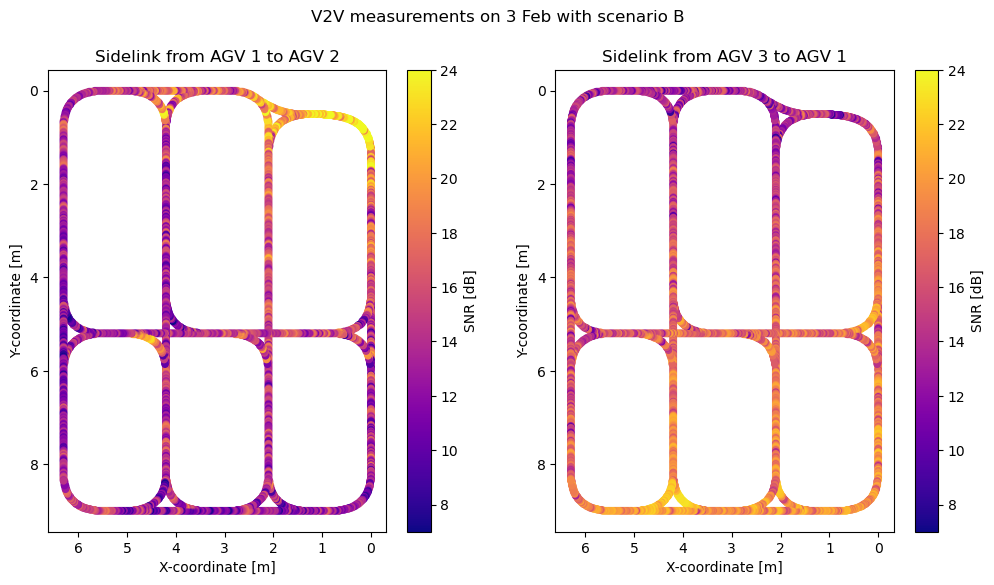

In [5]:
day = 3
scen = 'B'
ss_feat = "SNR [dB]"

test_df = iv2v_df[iv2v_df.index.day == day].query(f"`Wall Scenario` == '{scen}'")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle(f"V2V measurements on {day} Feb with scenario {scen}")

for src, dst, ax in ((1, 2, axes[0]), (3, 1, axes[1])):

    title = f"Sidelink from AGV {src} to AGV {dst}"

    plot_df = test_df.query(f"`Source AGV Index` == {src} & `Destination AGV Index` == {dst}")

    df_grid = spatial_avg(plot_df, pos_labels=(pos_x, pos_y), tile_size=0.02)

    df_grid.plot.scatter(pos_x, pos_y, c=ss_feat, vmin=7, vmax=24, cmap="plasma", ax =ax)
    ax.invert_xaxis()
    ax.invert_yaxis()
    _ = ax.set_title(title)